In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/TM_Spleen.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 11249 × 23341
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
A21.MAA000508.3_9_M.1.1,T cell,SS2
C6.MAA000508.3_9_M.1.1,B cell,SS2
A22.MAA000508.3_9_M.1.1,T cell,SS2
C8.MAA000508.3_9_M.1.1,B cell,SS2
E8.MAA000508.3_9_M.1.1,B cell,SS2
...,...,...
10X_P7_6_TTTGTCAGTTTGCATG,B cell,10X
10X_P7_6_TTTGTCATCAAACCAC,B cell,10X
10X_P7_6_TTTGTCATCGTGACAT,B cell,10X
10X_P7_6_TTTGTCATCTCAACTT,T cell,10X


In [7]:
batch_key = 'batch'

model = DeepMap(k = 10, mnn_only = False)
model.preprocess(adata, batch_key, gene_num = 4000)
model.integrate(n_iters = 2000, beta = 0.1)

Fri Jun  2 16:40:44 2023 Data normalization ...
Fri Jun  2 16:40:45 2023 Finding highly variable genes ...
Fri Jun  2 16:40:47 2023 Found 1109 highly variable genes
Fri Jun  2 16:40:47 2023 Saving unscaled data ...
Fri Jun  2 16:40:47 2023 Data Scaling ...
Fri Jun  2 16:40:47 2023 Performing PCA ...
Fri Jun  2 16:40:48 2023 Start integrating ...
Fri Jun  2 16:40:48 2023 GPU used.
Fri Jun  2 16:40:48 2023 Finding neighbors ...
Fri Jun  2 16:40:49 2023 Initial neighbor search completed, time used: 0.6 second.
Fri Jun  2 16:41:13 2023 Reconstructing neighbors 1/5 ...
Fri Jun  2 16:41:18 2023 Reconstructing neighbors 2/5 ...
Fri Jun  2 16:41:23 2023 Reconstructing neighbors 3/5 ...
Fri Jun  2 16:41:29 2023 Reconstructing neighbors 4/5 ...
Fri Jun  2 16:41:34 2023 Reconstructing neighbors 5/5 ...
Fri Jun  2 16:41:39 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 11249 × 20
    obs: 'celltype', 'batch'

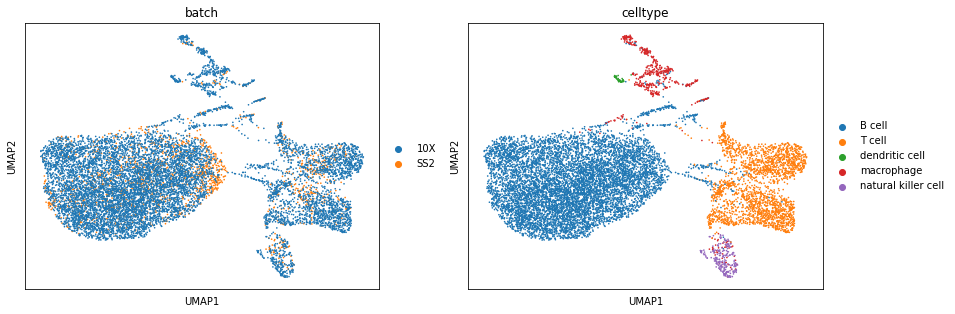

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])